# Microseismic data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

from obspy import read
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
datahome = '/Users/glyjw/Data/HornRiver/S_Well/'
st = read(datahome + '20130806.040535.S_Well.015.?')

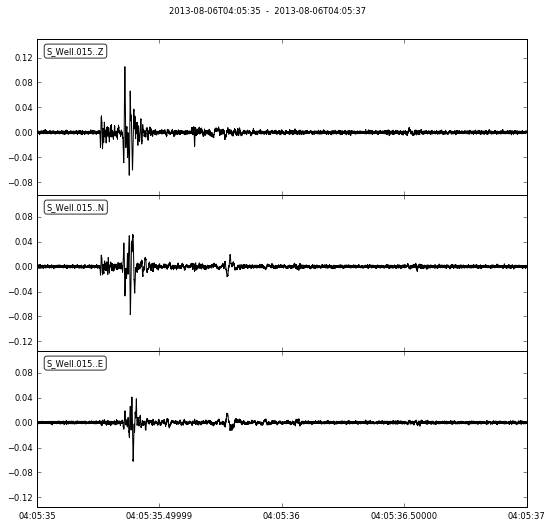

In [3]:
st.plot()

In [4]:
st[0].stats.sac['t1']

0.35075003

In [5]:
delta = st[0].stats.delta
t = sw.Trio(st[1].data,st[2].data,st[0].data,delta=delta)

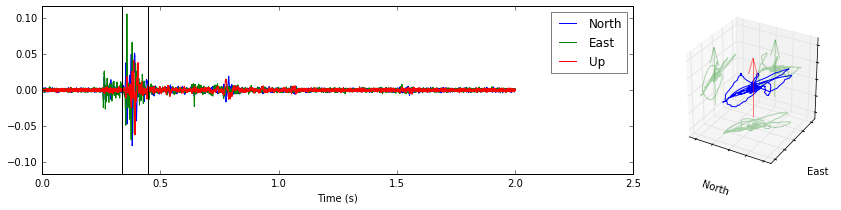

In [6]:
t.set_window(0.34,0.45,tukey=0.1)
t.plot()

AttributeError: 'NoneType' object has no attribute 'add_collection'

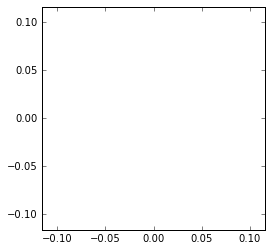

In [103]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
# from matplotlib.colors import ListedColormap, BoundaryNorm

fig, ax = plt.subplots(1)
# ax = plt.subplot(projection='3d')
ax = plt.subplot()

# set limit
lim = np.abs(t.data()).max() * 1.1 
ax.set_aspect('equal')
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
# ax.set_zlim([-lim,lim])

# plot data
xy = t.copy().chop().data()
x,y = xy[0], xy[1]

# multi-colored
norm = plt.Normalize(t.t().min(),t.t().max())
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc = LineCollection(segments,cmap='viridis',norm=norm)
ax = lc.set_array(t.t())
lc.set_linewidth(3)

line = ax.add_collection(lc)
plt.colorbar(line)

# fig2 = plt.figure()
# ax.add_collection(lc)
# axcb = plt.colorbar(lc)
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
# plt.show()

# ax.plot( x, y)

plt.show()

(-0.11590196788311004, 0.11590196788311004)

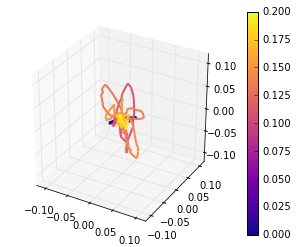

In [118]:
# from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D

x = t.x
y = t.y
z = t.z

dydx = t.t()  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = Line3DCollection(segments, cmap='plasma', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

# set limit
lim = np.abs(t.data()).max() * 1.1 
ax.set_aspect('equal')
ax.set_xlim([-lim,lim])
ax.set_ylim([-lim,lim])
ax.set_zlim([-lim,lim])

In [68]:
t.t().max()/3

0.066666670735677336

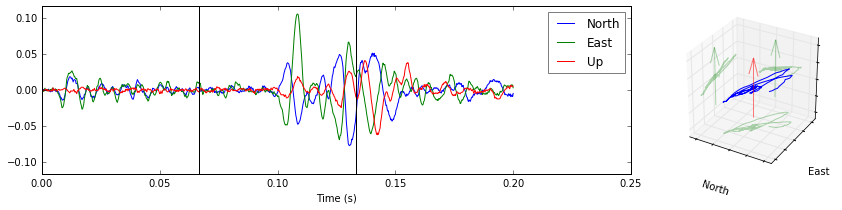

In [8]:
t = sw.Trio(s[1].data,s[2].data,s[0].data,delta=delta)
t.plot()

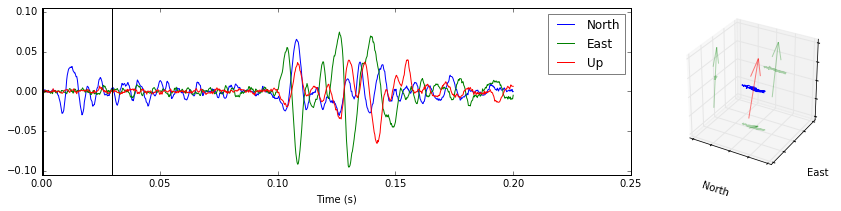

In [9]:
t.set_window(0.0,0.03)
t.set_ray()
t.rotate2ray()
t.plot()

# t.set_window(0.115,0.16)
# t.set_ray()
# t.rotate2ray()
# t.plot()

In [10]:
# get event info
from operator import itemgetter
keys = ['evla', 'evlo', 'evdp','stla','stlo','stdp']
evla, evlo, evdp, stla, stlo, stdp = itemgetter(*keys)(s[0].stats.sac)

In [11]:
dlo = stlo - evlo
dla = stla - evla
# dz = evdp - stdp
dz = stdp - evdp

azi = math.degrees( math.atan2( dla, dlo))
inc = math.degrees( math.atan2( (dlo**2+dla**2)**.5, dz))

print(azi,inc)

(90.76517359901344, 143.4192526413932)


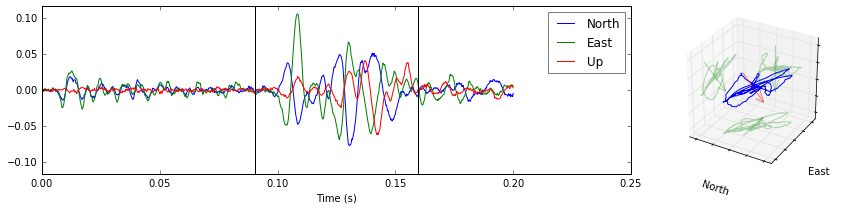

In [12]:
t.rotate2eye()
t.set_window(0.09,0.16)
t.set_ray(azi,inc)
# t.p_rotate()
t.plot()
# print(t.rayvecs)
# print(t.cmpvecs)


In [13]:
t.set_ray(np.array([0,1,1]))

In [ ]:
bs = sw.eigval.Bootstrap(p,window=w,tlags=np.linspace(0,0.01,41))

In [ ]:
# np.average(bs.stk_l1_l2,axis=0)

plt.contourf(m.tlags,m.degs,np.average(bs.stk_l1_l2,axis=0),26,cmap='magma')


In [ ]:
w2 = sw.Window(121,130)
# t.plot(window=w2)
tchop = t.copy()
tchop.chop(w2)
cov = np.cov(np.vstack((tchop.x,tchop.y,tchop.z)))
eigval, eigvec = np.linalg.eig(cov)
idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:,idx]

In [ ]:
# rotate data into eigenvector system.
trot = t.copy()
trot.x,trot.y,trot.z = np.dot(eigvec.T,trot.xyz())
trot.plot(window=w2)

In [ ]:
np.co

In [24]:
import colorcet as cc

ImportError: No module named colorcet